In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
### Import required functionalities
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
### Segregate features from labels
X = data.drop(labels = ['stab', 'stabf'], axis = 1)
y = data['stabf']

In [9]:
data_columns = X.columns

In [10]:
from collections import Counter
Counter(y)

Counter({'unstable': 6380, 'stable': 3620})

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


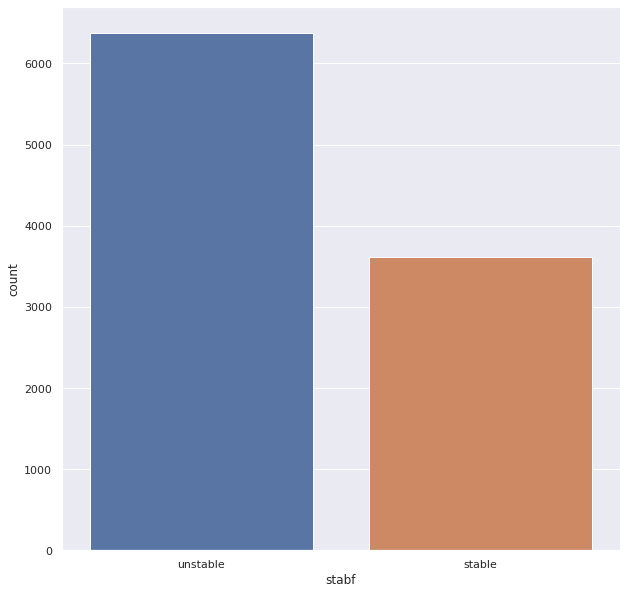

In [11]:
plt.figure(figsize = (10, 10))
sns.countplot(y)
plt.show()
plt.close()

The data is imbalanced. As such measures will have to be put in place to combat this state of affairs.

In [12]:
### Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1,
                                                    test_size = 0.2)

In [13]:
### Scale data features
scaler = StandardScaler()
le = LabelEncoder()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Encode labels
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [14]:
### Instantiate model objects
extra_tree = ExtraTreesClassifier(random_state = 1)
rfc = RandomForestClassifier(random_state = 1)
lgbm = LGBMClassifier(random_state = 1)
xgb = XGBClassifier(use_label_encoder = False, random_state = 1)

In [15]:
def train_model(model, score_func, X_train = X_train, y_train = y_train,
                X_test = X_test, y_test = y_test):

    """Train model and report performance."""

    model.fit(X_train, y_train)

    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)

    train_score = score_func(y_train, y_hat_train)
    test_score = score_func(y_test, y_hat_test)
    print(f'Train score: {train_score}\nTest score: {test_score}')
    return None

In [16]:
### Hyperparametric grid for ExtraTrees
hyperparameter_grid = dict(n_estimators = [50, 100, 300, 500, 1000],
                            min_samples_split = [2, 3, 5, 7, 9],
                            min_samples_leaf = [1, 2, 4, 6, 8], max_features = ['auto', 'sqrt', 'log2', None])

In [17]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [18]:
### Random forest accuracy
train_model(model = rfc, score_func = accuracy_score)

Train score: 1.0
Test score: 0.929


In [19]:
### XGB accuracy
train_model(model = xgb, score_func = accuracy_score)

[22:22:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score: 1.0
Test score: 0.9455


In [20]:
### Lightgbm accuracy
train_model(model = lgbm, score_func = accuracy_score)

Train score: 0.997875
Test score: 0.9395


In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
### Random search object
r_search = RandomizedSearchCV(estimator = extra_tree, param_distributions = hyperparameter_grid,
                                random_state = 1, cv = 5, n_iter = 10, scoring = 'accuracy',
                                n_jobs = -1, verbose = 1)

In [23]:
r_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [24]:
r_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [25]:
params = {'n_estimators': 1000,
            'random_state' : 1,
            'min_samples_split': 2,
            'min_samples_leaf': 8,
            'max_features': None}

In [26]:
new_etc = ExtraTreesClassifier(**params)

In [27]:
### New ExtraTrees object
train_model(model = new_etc, score_func = accuracy_score)

Train score: 0.98325
Test score: 0.927


In [28]:
### Original ExtraTrees object
train_model(model = extra_tree, score_func = accuracy_score)

Train score: 1.0
Test score: 0.928


In [29]:
### Feature importances
fi_dict = dict(zip(data_columns, new_etc.feature_importances_))

In [30]:
### Sorted feature importances
sorted(fi_dict.items(), key = lambda x: x[1])

[('p1', 0.003683422151688322),
 ('p4', 0.004962486591192238),
 ('p2', 0.005336864710946151),
 ('p3', 0.005429268421191957),
 ('g1', 0.10256244080927947),
 ('g2', 0.10757764577478764),
 ('g4', 0.10954089174337298),
 ('g3', 0.11306267999167334),
 ('tau3', 0.13468028520386593),
 ('tau4', 0.1354167630909727),
 ('tau1', 0.13723974766109256),
 ('tau2', 0.14050750384993677)]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e9a26bfe-1f49-4574-b1c5-96ccda50cffb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>